<a href="https://colab.research.google.com/github/mchoirulbahriadzimi/DETEKSI_OBJEK/blob/main/kelompok_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving IMG-20250505-WA0004.jpg to IMG-20250505-WA0004 (7).jpg


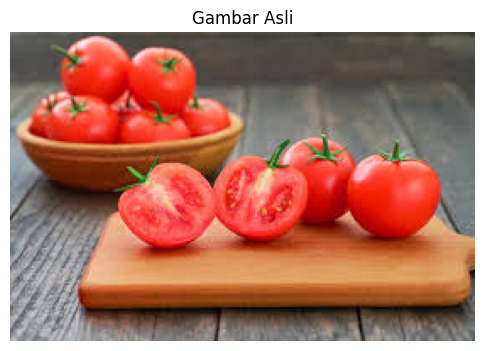

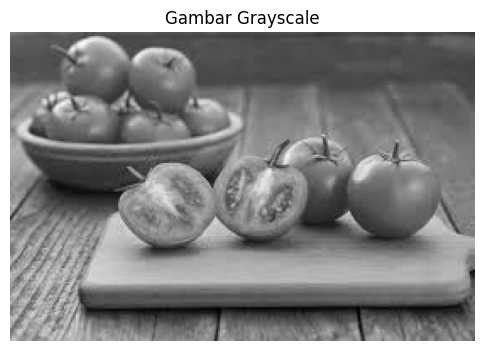

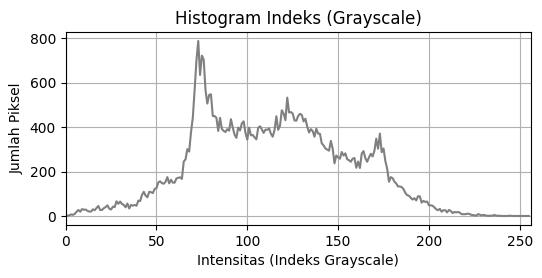

In [ ]:
# 1. Upload gambar
from google.colab import files
uploaded = files.upload()

# 2. Import Library
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 3. Baca gambar
filename = list(uploaded.keys())[0]
img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 4. Tampilkan gambar asli
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

# 5. Ubah menjadi grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 6. Tampilkan gambar grayscale
plt.figure(figsize=(6, 6))
plt.imshow(img_gray, cmap='gray')
plt.title("Gambar Grayscale")
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

# 7. Hitung histogram grayscale (ini adalah histogram indeks)
hist_gray = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

# 8. Plot histogram grayscale (histogram indeks)
plt.figure(figsize=(6, 2.5))
plt.plot(hist_gray, color='gray')
plt.title("Histogram Indeks (Grayscale)")
plt.xlabel("Intensitas (Indeks Grayscale)")
plt.ylabel("Jumlah Piksel")
plt.xlim([0, 256])
plt.grid(True)
plt.show()

🔼 Silakan upload 1 gambar referensi:


Saving IMG-20250505-WA0004.jpg to IMG-20250505-WA0004 (5).jpg
Gambar Referensi berhasil diupload: IMG-20250505-WA0004 (5).jpg


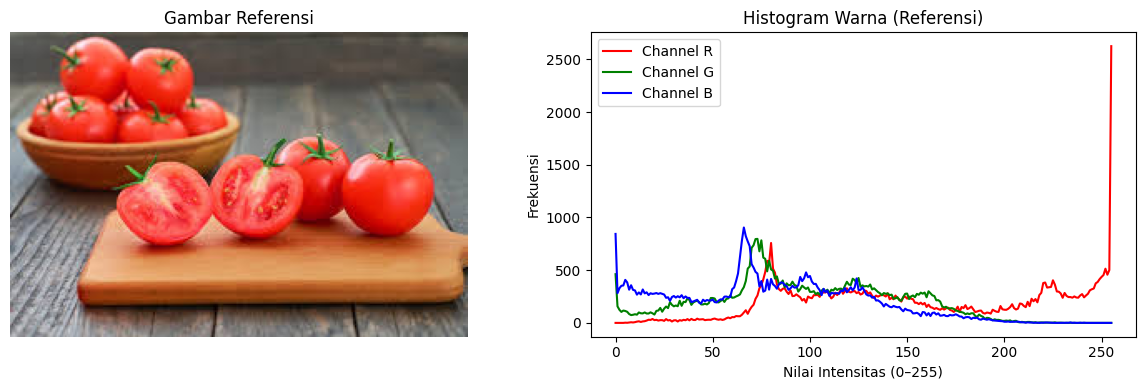

In [ ]:
# Instalasi library jika belum ada
!pip install scikit-image --quiet

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from google.colab import files

# Fungsi untuk upload gambar referensi
def upload_and_read_image(title="Upload gambar referensi"):
    uploaded = files.upload()
    for fname in uploaded:
        image = Image.open(BytesIO(uploaded[fname])).convert('RGB')
        print(f"{title} berhasil diupload: {fname}")
        return np.array(image)

# Fungsi untuk menampilkan gambar dan histogram warna (RGB)
def show_color_histogram(image, title):
    colors = ('r', 'g', 'b')
    channel_ids = (0, 1, 2)

    plt.figure(figsize=(12, 4))

    # Gambar
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

    # Histogram Warna
    plt.subplot(1, 2, 2)
    for channel_id, color in zip(channel_ids, colors):
        hist = cv2.calcHist([image], [channel_id], None, [256], [0, 256])
        plt.plot(hist, color=color, label=f'Channel {color.upper()}')
    plt.title('Histogram Warna (Referensi)')
    plt.xlabel('Nilai Intensitas (0–255)')
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.tight_layout()
    plt.show()

# === Upload dan tampilkan histogram referensi ===
print("🔼 Silakan upload 1 gambar referensi:")
img_reference = upload_and_read_image("Gambar Referensi")

# Tampilkan histogram warna
show_color_histogram(img_reference, "Gambar Referensi")

🔼 Silakan upload 1 gambar referensi:


Saving IMG-20250505-WA0004.jpg to IMG-20250505-WA0004 (6).jpg
Gambar Referensi berhasil diupload: IMG-20250505-WA0004 (6).jpg


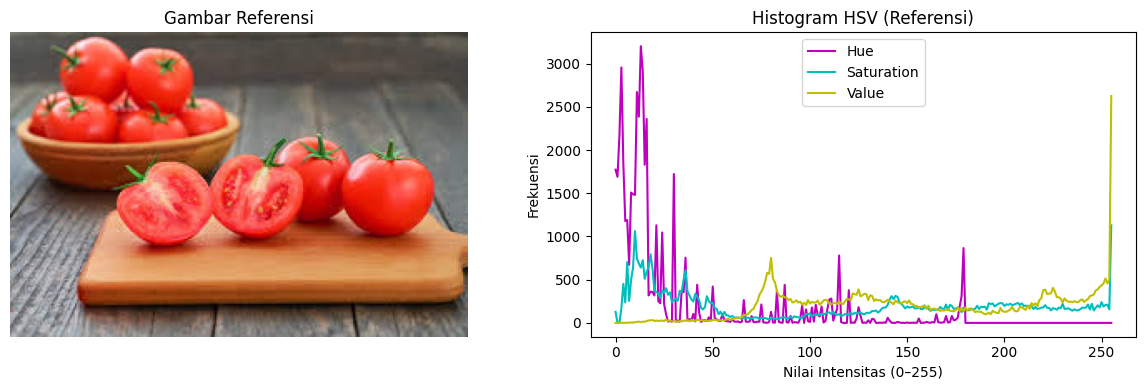

In [ ]:

# Instalasi library jika dibutuhkan
!pip install scikit-image --quiet

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from google.colab import files

# Fungsi upload gambar
def upload_and_read_image(title="Upload gambar referensi"):
    uploaded = files.upload()
    for fname in uploaded:
        image = Image.open(BytesIO(uploaded[fname])).convert('RGB')
        print(f"{title} berhasil diupload: {fname}")
        return np.array(image)

# Fungsi menampilkan histogram HSV
def show_hsv_histogram(image_rgb, title):
    # Konversi RGB ke HSV
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    channels = ('Hue', 'Saturation', 'Value')
    colors = ('m', 'c', 'y')  # Warna visualisasi (bisa disesuaikan)

    plt.figure(figsize=(12, 4))

    # Tampilkan gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')

    # Tampilkan histogram HSV
    plt.subplot(1, 2, 2)
    for i, (ch_name, color) in enumerate(zip(channels, colors)):
        hist = cv2.calcHist([image_hsv], [i], None, [256], [0, 256])
        plt.plot(hist, color=color, label=ch_name)
    plt.title('Histogram HSV (Referensi)')
    plt.xlabel('Nilai Intensitas (0–255)')
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.tight_layout()
    plt.show()

# === Upload gambar dan tampilkan histogram HSV ===
print("🔼 Silakan upload 1 gambar referensi:")
img_reference = upload_and_read_image("Gambar Referensi")

# Tampilkan histogram HSV
show_hsv_histogram(img_reference, "Gambar Referensi")

🔼 Upload gambar buah untuk histogram Hue:


Saving IMG-20250505-WA0004.jpg to IMG-20250505-WA0004 (12).jpg


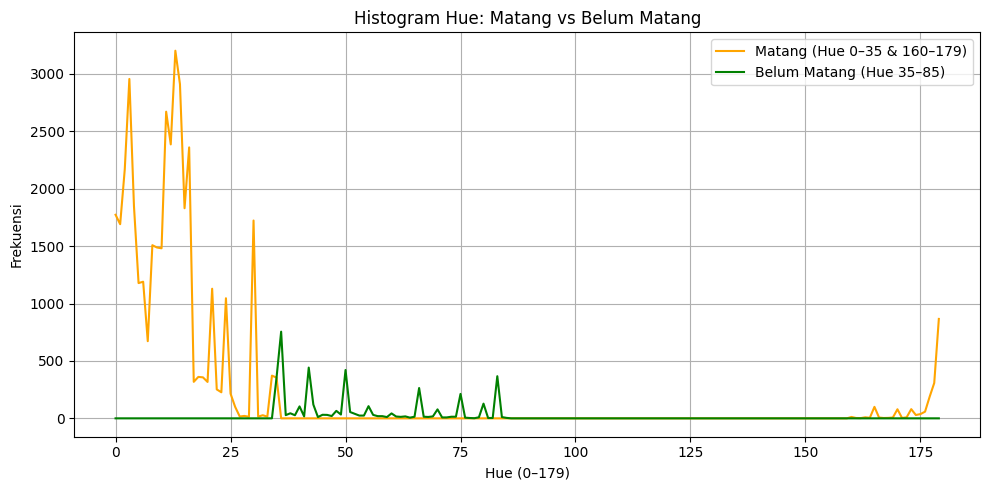

🔍 Jumlah piksel warna matang     : 42004
🔍 Jumlah piksel warna belum matang : 4116


In [ ]:

import cv2
import numpy as np
from PIL import Image
from io import BytesIO
from google.colab import files
import matplotlib.pyplot as plt

# Upload gambar
def upload_image():
    uploaded = files.upload()
    for fname in uploaded:
        image = Image.open(BytesIO(uploaded[fname])).convert('RGB')
        return np.array(image)

# Fungsi untuk menampilkan histogram Hue dengan pembagian matang vs belum matang
def hue_histogram_with_ripeness(image_rgb):
    # Konversi ke HSV
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    hue = image_hsv[:, :, 0]

    # Mask Warna Matang (merah/kuning/oranye): Hue 0–35 dan 160–179
    mask_matang = cv2.inRange(hue, 0, 35)
    mask_matang |= cv2.inRange(hue, 160, 179)

    # Mask Warna Belum Matang (hijau): Hue 35–85
    mask_mentah = cv2.inRange(hue, 35, 85)

    # Filter pixel sesuai mask
    hue_matang = hue[mask_matang > 0]
    hue_mentah = hue[mask_mentah > 0]

    # Histogram
    bins = 180
    hist_matang, _ = np.histogram(hue_matang, bins=bins, range=(0, 180))
    hist_mentah, _ = np.histogram(hue_mentah, bins=bins, range=(0, 180))

    # Plot histogram Hue
    plt.figure(figsize=(10, 5))
    plt.plot(hist_matang, color='orange', label='Matang (Hue 0–35 & 160–179)')
    plt.plot(hist_mentah, color='green', label='Belum Matang (Hue 35–85)')
    plt.title('Histogram Hue: Matang vs Belum Matang')
    plt.xlabel('Hue (0–179)')
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Informasi tambahan
    print(f"🔍 Jumlah piksel warna matang     : {len(hue_matang)}")
    print(f"🔍 Jumlah piksel warna belum matang : {len(hue_mentah)}")

# Jalankan
print("🔼 Upload gambar buah untuk histogram Hue:")
img = upload_image()
hue_histogram_with_ripeness(img)